In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import datetime
import pygmt

GMTCLibNotFoundError: Error loading GMT shared library at 'libgmt.so'.
libgmt.so: cannot open shared object file: No such file or directory

In [27]:
data = pd.read_csv('../hypocentres/bc_earthquakes_usgs.csv')
nrcan_data = pd.read_csv('../hypocentres/bc_earthquakes_nrcan.eq', delimiter='|')
nrcan_2013 = pd.read_csv('../hypocentres/2013_09_earthquakes_nrcan.eq', delimiter='|')

Text(0, 0.5, 'Latitude')

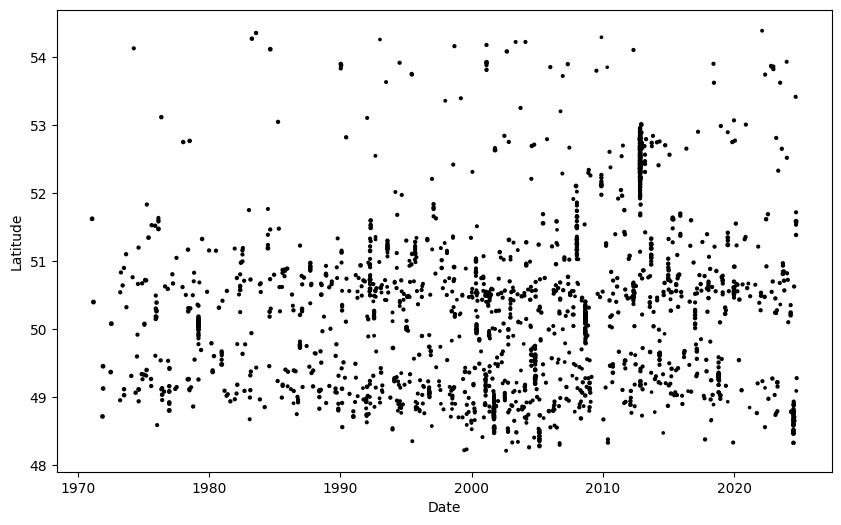

In [28]:
# plot histogram of events with respect to time
data['time'] = pd.to_datetime(data['time'])
data['time'] = data['time'].dt.tz_localize(None)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data['mag'] = data['mag'].astype(float)

nrcan_data['time'] = pd.to_datetime(nrcan_data['Time'])
nrcan_data['time'] = nrcan_data['time'].dt.tz_localize(None)
nrcan_data['latitude'] = nrcan_data['Latitude'].astype(float)
nrcan_data['longitude'] = nrcan_data['Longitude'].astype(float)
nrcan_data['mag'] = nrcan_data['Magnitude'].astype(float)

nrcan_2013['time'] = pd.to_datetime(nrcan_2013['Time'])
nrcan_2013['time'] = nrcan_2013['time'].dt.tz_localize(None)
nrcan_2013['latitude'] = nrcan_2013['Latitude'].astype(float)
nrcan_2013['longitude'] = nrcan_2013['Longitude'].astype(float)
nrcan_2013['mag'] = nrcan_2013['Magnitude'].astype(float)

plt.figure(figsize=(10,6))
plt.scatter(data['time'], data['latitude'], c='k', s=data['mag'])
plt.xlabel('Date')
plt.ylabel('Latitude')


In [17]:
region = [
    -132,
    -128,
    48.8,
    52] # whole region

region = [
    -131,
    -129.2,
    50,
    51]

# region = [
#     -131.5,
#     -130,
#     50.8,
#     51.7] # 2008, 2013 doublets

print(data_clipped['longitude'].min(), data_clipped['longitude'].max(), data_clipped['latitude'].min(), data_clipped['latitude'].max())

fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
# grid_map = pygmt.datasets.load_earth_relief(
#     resolution="30s",
#     region=region,
# )
# fig.grdimage(grid='bathymetry.tiff', 
#              region=region,
#              cmap="oleron",
#              frame=True)

# colormap based on timestamp
pygmt.makecpt(cmap='jet', 
              series=[int(mindate.strftime("%Y%m%d")), int(maxdate.strftime("%Y%m%d"))])

fig.plot(x=data_clipped['longitude'], 
         y=data_clipped['latitude'], 
         style='c', 
         pen="0.2p,black",
         size=data_clipped['mag']**2 * 0.01,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d"))), 
         cmap=True)
# fig.plot(x=data_m6['longitude'], y=data_m6['latitude'], style='a0.5c', fill='red')
fig.meca('../gcmt/2008_doublet.eq', 
         scale=0.3, 
         convention='mt')
fig.colorbar(frame='af+lDate')

# fig.savefig('2008_doublet.png')

-130.639 -128.8164 50.0714 50.8326


C:\Users\lekim\AppData\Local\Temp\ipykernel_9368\941637583.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_9368\941637583.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_9368\941637583.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
C:\Users\lekim\AppData\Local\Temp\ipykernel_9368\941637583.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]


773   -131.034
774   -131.285
775   -131.330
776   -131.223
777   -131.044
778   -130.667
779   -131.746
780   -130.919
781   -130.102
782   -130.737
783   -131.158
784   -131.310
785   -131.380
786   -131.080
787   -130.277
788   -131.095
789   -130.974
790   -131.428
791   -131.052
792   -130.542
793   -131.073
794   -130.868
795   -131.677
796   -130.746
Name: longitude, dtype: float64
326   -130.4990
327   -130.5088
328   -130.5600
329   -130.6400
330   -130.5932
331   -130.5110
332   -130.1497
333   -130.2245
334   -130.4766
335   -130.2195
336   -130.4752
337   -130.2999
338   -130.1714
339   -130.3971
Name: longitude, dtype: float64
160   -129.5261
161   -128.9922
162   -129.4995
163   -129.2090
164   -129.5534
165   -129.3900
166   -128.8393
167   -129.6508
168   -129.6659
169   -129.0661
170   -129.3854
171   -129.7237
172   -129.2890
173   -129.4124
Name: longitude, dtype: float64
120   -130.2782
121   -129.3485
122   -129.9630
123   -132.7540
124   -129.7652
125   -129.1629


text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)
text [WARNING]: Vertical text justification not set, defaults to B(ottom)


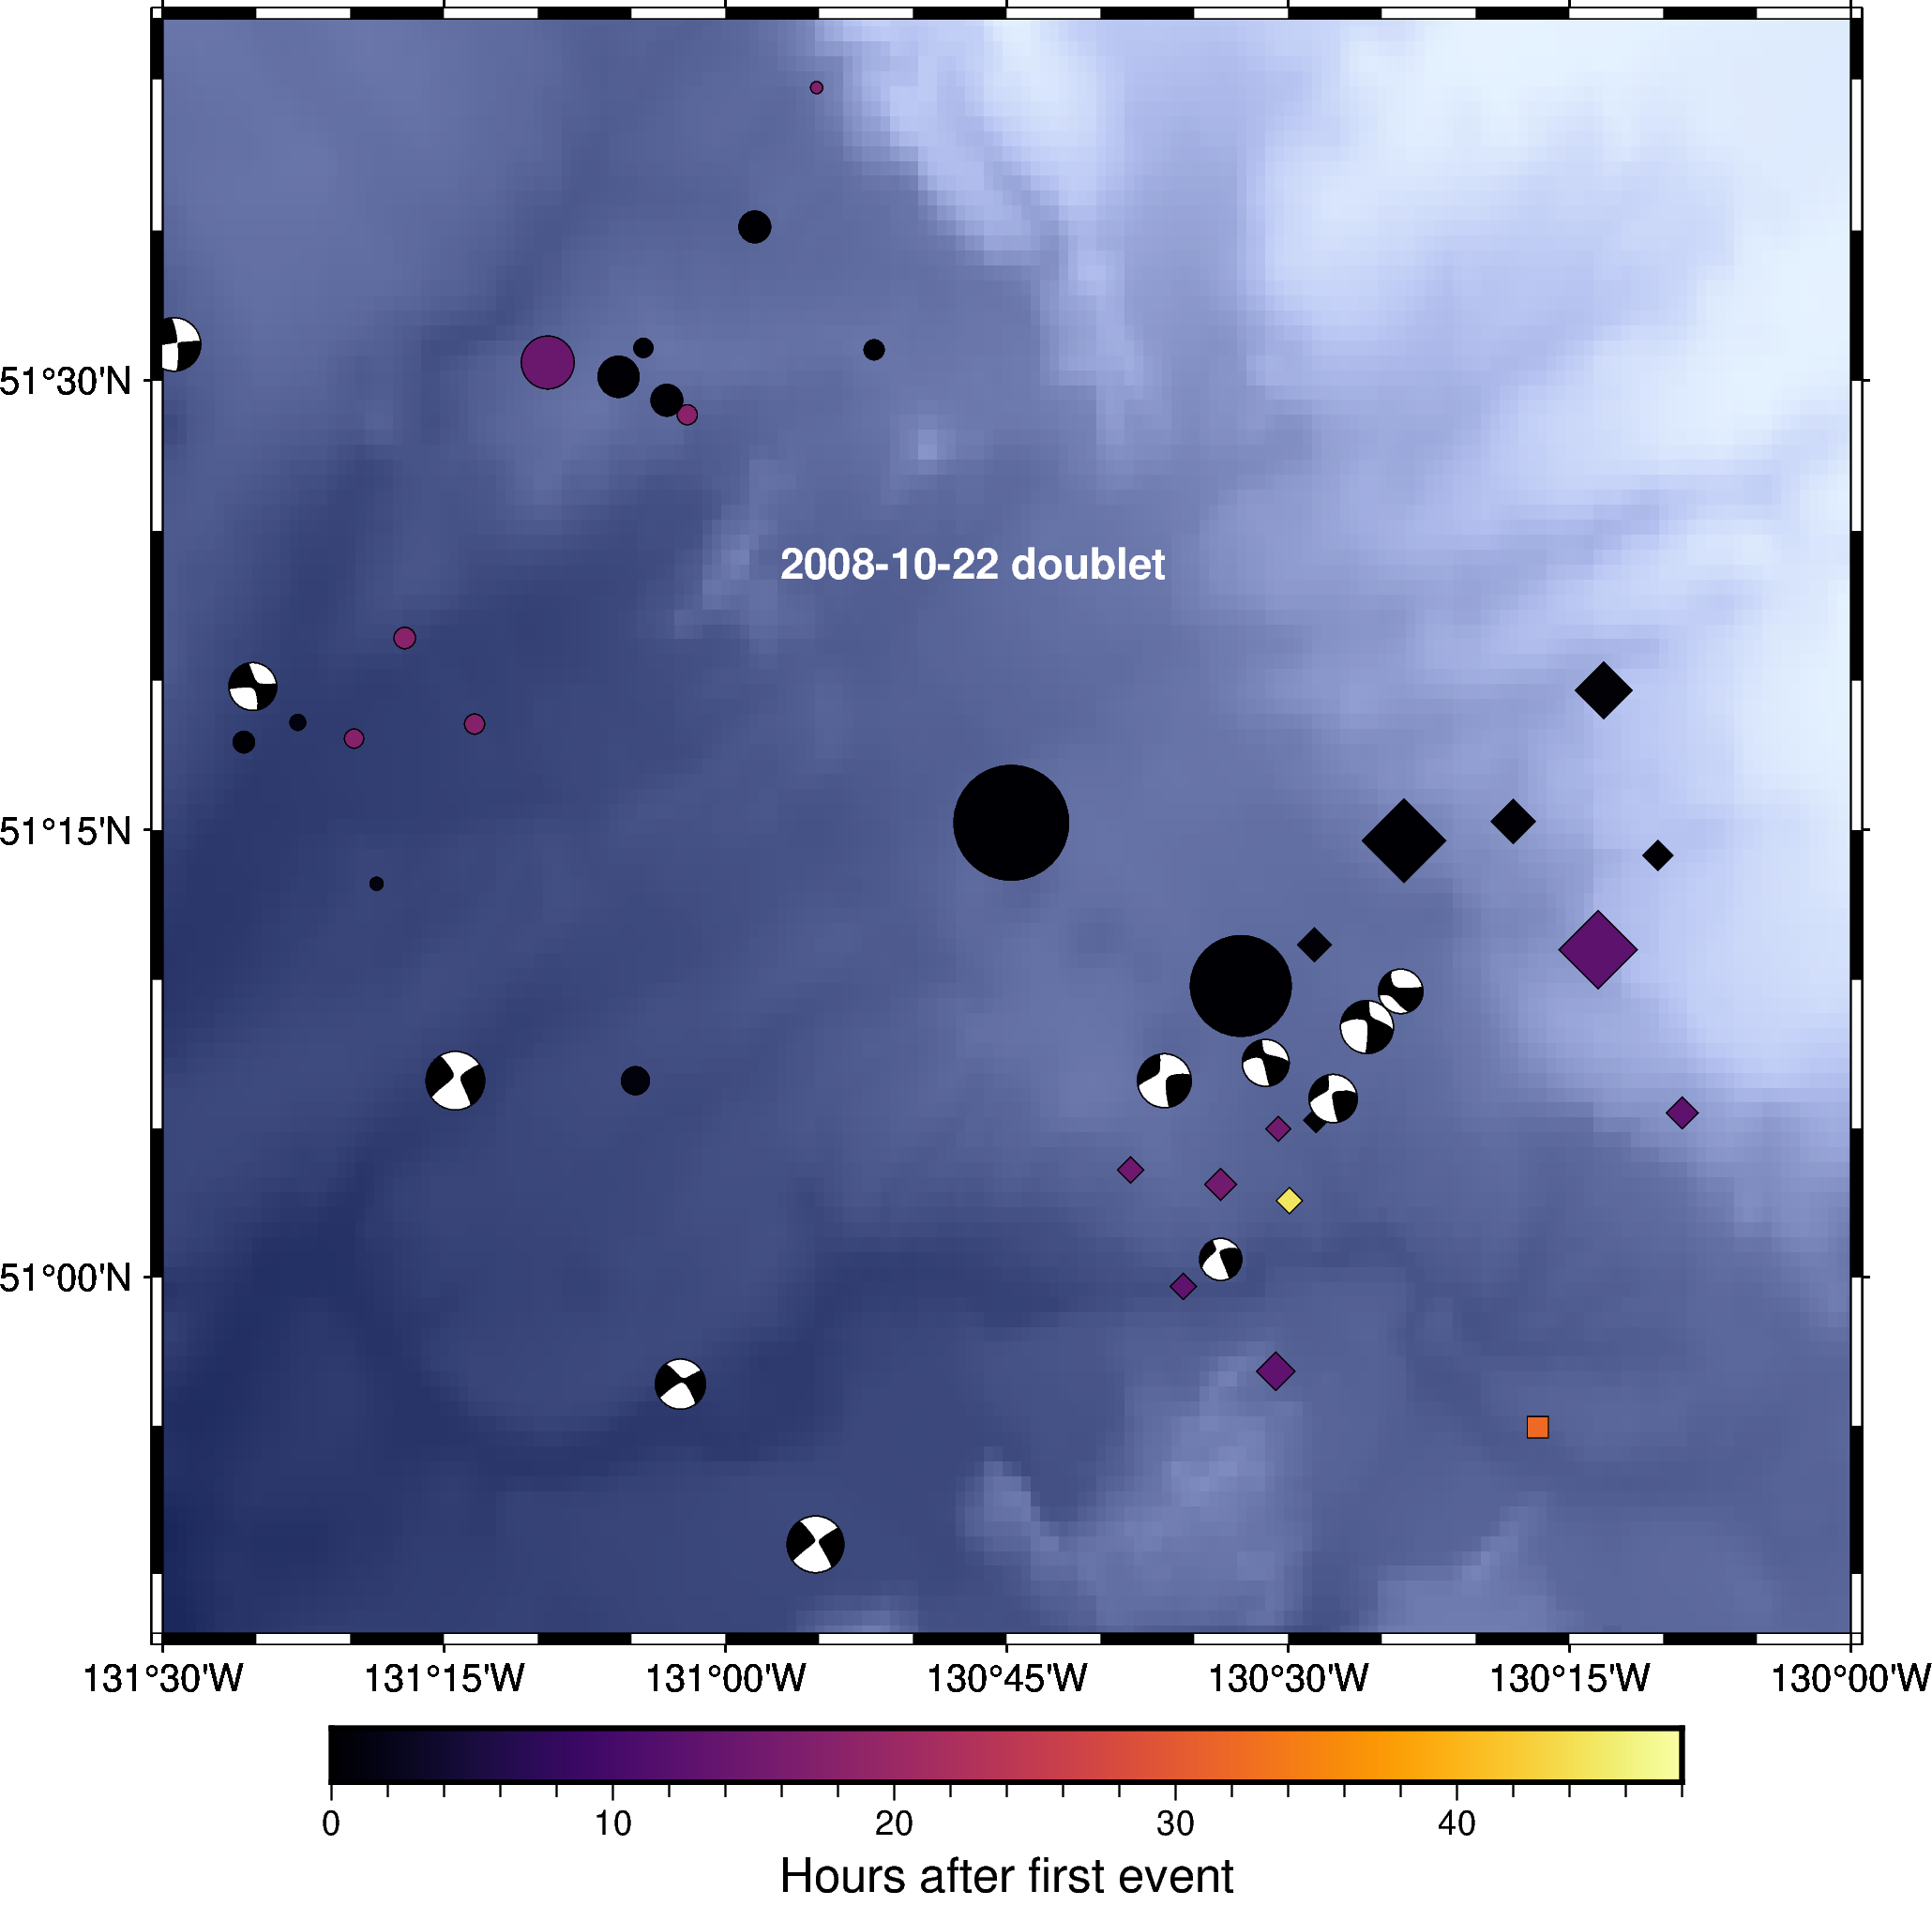

In [6]:
fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
grid_map = pygmt.datasets.load_earth_relief(
    resolution="30s",
    region=region)

fig.grdimage(grid='../terrain/bathymetry.tiff', 
             region=region,
             cmap="oleron",
             nan_transparent=True,
             frame=True)

fig.grdimage(grid=grid_map,
             cmap="oleron",
             frame=True)

for date_pair, fms_name, symbol in zip(date_list, fms_list, symbol_list):

    # cut data
    data_clipped = data[data['time'] >= date_pair[0]][data['time'] <= date_pair[1]]
    print(data_clipped['longitude'])

    # extract time range
    min_date = date_pair[0]
    max_date = date_pair[1] #data_clipped['time'].max()

    # make colormap
    pygmt.makecpt(cmap='inferno', 
                  series=[int(min_date.strftime("%Y%m%d%H%M%S")), int(max_date.strftime("%Y%m%d%H%M%S"))])
    
    fig.plot(x=data_clipped['longitude'], 
         y=data_clipped['latitude'], 
         style=symbol, 
         pen="0.2p,black",
         size=1.9**data_clipped['mag'] * 0.015,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d%H%M%S"))), 
         cmap=True)
    
    fig.meca('../gcmt/' + fms_name + '.eq',
                scale=0.4, 
                convention='mt')

pygmt.makecpt(cmap='inferno',
              series=[0, 48])

fig.colorbar(frame='af+lHours after first event')

# labels
fig.text(x=-130.78, y=51.39, text='2008-10-22 doublet', font='11p,Helvetica-Bold,white', justify='CB')
fig.text(x=-129.5, y=51.2, text='2013-09-03 doublet', font='11p,Helvetica-Bold', justify='LC')
fig.text(x=-128.6, y=49.25, text='2018-10-22 Triplet', font='11p,Helvetica-Bold, white', justify='LC')
fig.text(x=-129.4, y=50.35, text='2019-12-23 Triplet', font='11p,Helvetica-Bold,white', justify='LC')

# zoom in
lon_min, lat_min = -131.5, 50.8
lon_max, lat_max = -130, 51.7
rectangle = [
    [lon_min, lat_min],
    [lon_max, lat_min],
    [lon_max, lat_max],
    [lon_min, lat_max],
    [lon_min, lat_min]  # Closing the polygon
]

# Plot the rectangle
# fig.plot(
#     x=[coord[0] for coord in rectangle],  # Extract longitudes
#     y=[coord[1] for coord in rectangle],  # Extract latitudes
#     pen="2p,red")  # Pen thickness and color
    
fig.show()
# fig.savefig('bc_multiplets.png')

In [29]:
fig = pygmt.Figure()
fig.basemap(region=region, projection='M6i', frame=True)
grid_map = pygmt.datasets.load_earth_relief(
    resolution="30s",
    region=region)

fig.grdimage(grid='../terrain/bathymetry.tiff', 
             region=region,
             cmap="oleron",
             nan_transparent=True,
             frame=True)

fig.grdimage(grid=grid_map,
             cmap="oleron",
             frame=True)

for date_pair, fms_name, symbol in zip(date_list, fms_list, symbol_list):

    print(date_pair[0])
    if date_pair[0] != datetime(2019, 12, 23, 19, 49, 40):# datetime(2018, 10, 22, 5, 39, 32): # datetime(2008, 1, 5, 11, 1, 0): datetime(2013, 9, 3, 20, 19, 0):  
        continue

    # cut data
    data_clipped = nrcan_2013[nrcan_2013['time'] >= date_pair[0]][nrcan_2013['time'] <= date_pair[1]]
    x_data = data_clipped['longitude'].to_numpy()
    y_data = data_clipped['latitude'].to_numpy()
    mag_data = data_clipped['mag'].to_numpy()

    # extract time range
    min_date = date_pair[0]
    max_date = date_pair[1] #data_clipped['time'].max()

    # make colormap
    pygmt.makecpt(cmap='inferno', 
                  series=[int(min_date.strftime("%Y%m%d%H%M%S")), int(max_date.strftime("%Y%m%d%H%M%S"))])
    
    time_diff = max_date - min_date
    
    fig.plot(x=x_data, 
         y=y_data, 
         style=symbol, 
         pen="0.2p,black",
         size=1.9**mag_data * 0.015,
         fill=data_clipped['time'].apply(lambda d: int(d.strftime("%Y%m%d%H%M%S"))), 
         cmap=True)
    
    # fig.meca('../gcmt/' + fms_name + '.eq',
    #             scale=0.4, 
    #             convention='mt')
    
pygmt.makecpt(cmap='inferno',
              series=[0, time_diff.total_seconds() / 3600])

fig.colorbar(frame='af+lHours after first event')

# labels
# fig.text(x=-130.78, y=51.39, text='2008-10-22 Doublet', font='11p,Helvetica-Bold,white', justify='CB')
# fig.text(x=-129.5, y=51.2, text='2013-09-03 Doublet', font='11p,Helvetica-Bold', justify='LC')
# fig.text(x=-129.6, y=49.25, text='2018-10-22 Triplet', font='11p,Helvetica-Bold, white', justify='LC')
fig.text(x=-129.4, y=50.35, text='2019-12-23 Triplet', font='11p,Helvetica-Bold,white', justify='LC')

# zoom in
lon_min, lat_min = -131.5, 50.8
lon_max, lat_max = -130, 51.7
rectangle = [
    [lon_min, lat_min],
    [lon_max, lat_min],
    [lon_max, lat_max],
    [lon_min, lat_max],
    [lon_min, lat_min]  # Closing the polygon
]

# Plot the rectangle
# fig.plot(
#     x=[coord[0] for coord in rectangle],  # Extract longitudes
#     y=[coord[1] for coord in rectangle],  # Extract latitudes
#     pen="2p,red")  # Pen thickness and color
    

fig.savefig('2019_multiplet_nrcan.png')

C:\Users\lekim\AppData\Local\Temp\ipykernel_9368\4140695707.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_clipped = nrcan_2013[nrcan_2013['time'] >= date_pair[0]][nrcan_2013['time'] <= date_pair[1]]
text [WARNING]: Vertical text justification not set, defaults to B(ottom)


2008-01-05 11:01:00
2013-09-03 20:19:00
2018-10-22 05:39:32
2019-12-23 19:49:40
